In [2]:
import folium
import pandas as pd
from folium.plugins import HeatMap

In [4]:
data = pd.read_csv('manila_floods.csv')

In [6]:
data.head()

,lat,lon,flood_heig,elevation,precipitat
0,14.640394,121.055708,0,54.553295,9.0
1,14.698299,121.002132,0,21.856272,10.0
2,14.698858,121.100261,0,69.322807,16.0
3,14.571310,120.983334,0,10.987241,8.0
4,14.762232,121.075735,0,87.889847,18.0


## Relationship Between Flood Height, Elevation, and Precipitation

- **Precipitation** increases surface water. If the ground can't absorb it fast enough, flooding can occur.
- **Elevation** affects where water flows. Water moves from higher to lower ground, making low-lying areas more flood-prone.
- **Flood Height** is how high the water rises during a flood. It's influenced by:
  - The amount of precipitation
  - The area's elevation and drainage

### Summary:
- **More precipitation** → more surface water.
- **Lower elevation** → higher flood risk.
- **Flood height** rises when water accumulates in low or poorly drained areas.


In [11]:
#Data Cleaning, we need numeric olumns
#Lets check for NaNs
data[data.isna().any(axis=1)]

,lat,lon,flood_heig,elevation,precipitat


In [15]:
data.isna().sum().sum()


0

In [17]:
#checking for null values
data.isnull().sum()

lat           0
lon           0
flood_heig    0
elevation     0
precipitat    0
dtype: int64

## Why Normalize Data?

Normalization is important when working with datasets that contain features with different scales. For example, in this dataset:

- `flood_heig` might range from 0 to 8
- `elevation` could be as high as 80+
- `precipitat` might range between 0 and 20

If left unscaled, features with larger numeric ranges can dominate others in certain algorithms, leading to biased or misleading results.

### When Normalization Matters
Normalization is especially useful when:
- Using **machine learning models** that rely on numerical calculations (e.g., linear regression, neural networks)
- Working with **distance-based algorithms** (e.g., k-nearest neighbors, K-means clustering, SVM)
- Performing **dimensionality reduction** (e.g., PCA)
- Comparing or visualizing features on a common scale

### When It’s Less Important
Normalization is generally **not needed** for:
- Tree-based models (e.g., decision trees, random forests, XGBoost)
- Algorithms that split or sort data rather than compute distances

### Min-Max Normalization Formula

To normalize a value using min-max scaling:

X = (X-Xmin)/ (Xmax -Xmin)

This scales all values in the feature to a range between 0 and 1, while preserving the original distribution shape.


In [42]:
#normalize flood_height
#X = (X-Xmin)/Xmax -Xmin
#created a new column for normalized flood height
data["normalized_flood_height"] = (data["flood_heig"] - data["flood_heig"].min()) / (data["flood_heig"].max() - data["flood_heig"].min())

In [44]:
data.head()

,lat,lon,flood_heig,elevation,precipitat,normalized_flood_height
0,14.640394,121.055708,0,54.553295,9.0,0.0
1,14.698299,121.002132,0,21.856272,10.0,0.0
2,14.698858,121.100261,0,69.322807,16.0,0.0
3,14.571310,120.983334,0,10.987241,8.0,0.0
4,14.762232,121.075735,0,87.889847,18.0,0.0


In [48]:
#normalize elevation
data["normalized_elevation"] = (data["elevation"] - data["elevation"].min()) / (data["elevation"].max() - data["elevation"].min())

In [50]:
data.head()

,lat,lon,flood_heig,elevation,precipitat,normalized_flood_height,normalized_elevation
0,14.640394,121.055708,0,54.553295,9.0,0.0,0.594044
1,14.698299,121.002132,0,21.856272,10.0,0.0,0.237998
2,14.698858,121.100261,0,69.322807,16.0,0.0,0.754873
3,14.571310,120.983334,0,10.987241,8.0,0.0,0.119643
4,14.762232,121.075735,0,87.889847,18.0,0.0,0.957054


In [52]:
#normalize precipitation
data["normalized_precipitation"] = (data["precipitat"] - data["precipitat"].min()) / (data["precipitat"].max() - data["precipitat"].min())

In [54]:
data.head()

,lat,lon,flood_heig,elevation,precipitat,normalized_flood_height,normalized_elevation,normalized_precipitation
0,14.640394,121.055708,0,54.553295,9.0,0.0,0.594044,0.428571
1,14.698299,121.002132,0,21.856272,10.0,0.0,0.237998,0.476190
2,14.698858,121.100261,0,69.322807,16.0,0.0,0.754873,0.761905
3,14.571310,120.983334,0,10.987241,8.0,0.0,0.119643,0.380952
4,14.762232,121.075735,0,87.889847,18.0,0.0,0.957054,0.857143


<Axes: xlabel='elevation', ylabel='flood_heig'>

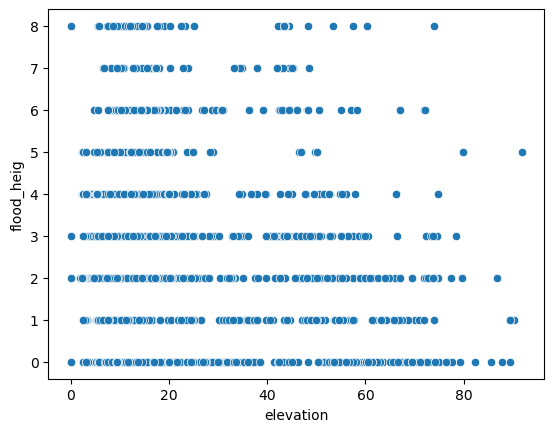

In [59]:
#checking for proportionality and correlation
import seaborn as sns
sns.scatterplot(x=data['elevation'], y=data['flood_heig'])

In [61]:
data[['elevation', 'flood_heig']].corr()

,elevation,flood_heig
elevation,1.000000,-0.051167
flood_heig,-0.051167,1.000000


<Axes: xlabel='elevation', ylabel='flood_heig'>

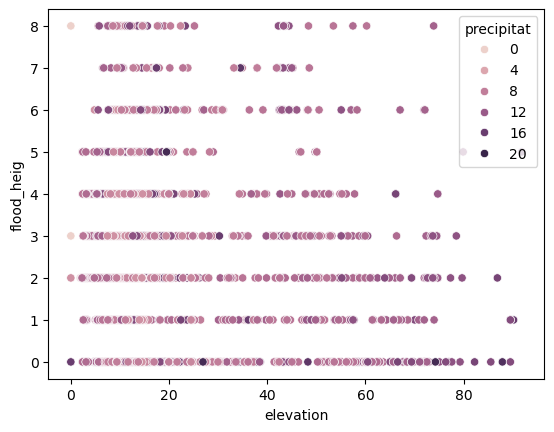

In [65]:
sns.scatterplot(data=data, x='elevation', y='flood_heig', hue='precipitat')

In [71]:
# Invert normalized elevation so that higher values represent lower elevation (i.e., more flood-prone areas).
# This makes interpretation and modeling more consistent, since higher values across features (like rainfall and flood height) will now consistently indicate greater flood risk.
data["normalized_elevation"] = 1 - data["normalized_elevation"]

In [73]:
data.head()

,lat,lon,flood_heig,elevation,precipitat,normalized_flood_height,normalized_elevation,normalized_precipitation
0,14.640394,121.055708,0,54.553295,9.0,0.0,0.594044,0.428571
1,14.698299,121.002132,0,21.856272,10.0,0.0,0.237998,0.476190
2,14.698858,121.100261,0,69.322807,16.0,0.0,0.754873,0.761905
3,14.571310,120.983334,0,10.987241,8.0,0.0,0.119643,0.380952
4,14.762232,121.075735,0,87.889847,18.0,0.0,0.957054,0.857143


In [75]:
#calculate flood risk score
data['risk score'] = (data["normalized_flood_height"] * 0.5 + data["normalized_elevation"] * 0.3 + data["normalized_precipitation"] * 0.2)

In [101]:
#for index, row in data.iterrows():
#    print(f"Location {index}: (Lat: {row['lat']}, Lon: {row['lon']}), Flood Height: {row['flood_heig']} → Risk Score: {row['risk score']:.3f}")

In [93]:
def get_risk_color(risk_score):
    """
    Returns a color code based on the flood risk score.
    
    - Dark red: Very high risk (≥ 0.8)
    - Red: High risk (0.6 to < 0.8)
    - Orange: Moderate risk (0.4 to < 0.6)
    - Light green: Low risk (0.2 to < 0.4)
    - Dark green: Very low risk (< 0.2)
    """
    if risk_score >= 0.8:
        return "darkred"
    elif risk_score >= 0.6:
        return "red"
    elif risk_score >= 0.4:
        return "orange"
    elif risk_score >= 0.2:
        return "lightgreen"
    else:
        return "darkgreen"


In [95]:
#add color to the cdataframe.
data['risk_color'] = data['risk score'].apply(get_risk_color)

In [97]:
#create map
manila_map = folium.Map(location=[14.5995, 120.9842], zoom_start=12)

In [103]:
#create data for heatmap
heat_data = data[['lat','lon','risk score']].values.tolist()

#add to HeatMap, then add heatmap to map
HeatMap(heat_data, radius=15, max_zoom=13).add_to(manila_map)

In [107]:
#for index, row in data.iterrows():
#    print(f"Location {index}: (Lat: {row['lat']}, Lon: {row['lon']}), Flood Height: {row['flood_heig']} → Risk Score: {row['risk score']:.3f}, Risk Color: {row['risk_color']}")

In [109]:
#save map as html
manila_map.save('manila_foold_rish_map.html')

In [111]:
manila_map